# **Практика 4. Группировка**

Вы digital-менеджер музыкального лейбла. Ваша задача — разработать стратегию продвижения нового артиста. В вашем распоряжении — датасет с ключевыми метриками по его релизам:


| Признак             | Описание                                |
| ------------------- | --------------------------------------- |
| track |  название конкретной песни или композиции |
| album |  название альбома или сингла, в который входит этот трек |
| album_release_year |  год, когда альбом был первоначально выпущен и опубликован. |
| period |  отчетный период, за который собраны данные (год/месяц) |
| period_year |  отчетный год, за который собраны данные |
| period_month |  отчетный месяц, за который собраны данные |
| country |  страна, из которой поступило прослушивание |
| platform |  название стримингового сервиса, на котором было совершено прослушивание |
| playcount |  количество воспроизведений данного трека на указанной платформе в указанной стране за отчетный период |
| royalty |  cумма денег, которую заработал этот трек за все свои проигрывания в указанный период, стране и на платформе |

In [ ]:
import pandas as pd
df = pd.read_csv('../data/music_label_data.csv')

## **Задание 1**

> *Изучите предоставленные данные и укажите:*
>1) *количество наблюдений*?

>2. *отчетный период данных (`period`):*  
>- *с*: ``???``  
>- *до*: ``???``  

>3. *количество треков (`track`) артиста* ?

>4. *количество альбомов (`album`) артиста (без учета синглов)* ?


>5. *количество синглов артиста (**single**; `album`)* ?


>6. *общее количество прослушиваний треков артиста (`playcount`)* ?

>7. *общий доход (`royalty`) от треков (округлите до сотых)* ?

---

## **Задание 2**

### *Задание 2.1*

>*Укажите названия платформы (`platform`) на которой доход от стриминга (`royalty`)*
>- наименьший: `???`
>- наибольший: `???`

### *Задание 2.2*

>*Создайте новый признак `CPL`, в котором будет информация о стоимости одного прослушивания (`royalty`/`playcount`). Укажите названия платформы (`platform`) на которой средняя стоимость одного прослушивания (`CPL`)*
>- наименьшая: `???`
>- наибольшая: `???`

### *Задание 2.3*

>*Укажите как выглядит распределение количества треков (`track`) на каждой платформе (`platform`):*

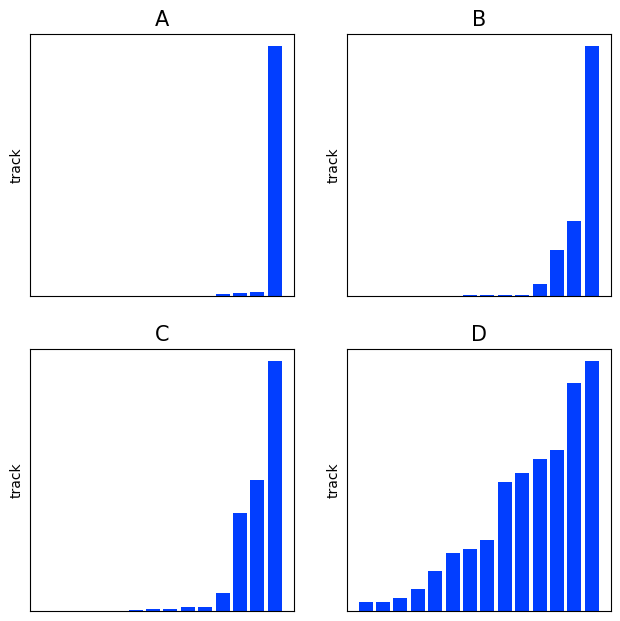

---

## **Задание 3**

Артист, продвижением которого мы занимаемся, создает музыку на русском языке. Это определяет нашу  целевую аудиторию — слушателей в странах с широким распространением русского языка:

In [6]:
russian_speaking_countries = ["Belarus", "Kazakhstan", "Kyrgyzstan", "Ukraine", "Uzbekistan", "Tajikistan", "Azerbaijan", "Moldova", "Armenia", "Turkmenistan", "Georgia", "Latvia", "Estonia", "Lithuania", "Israel", "Germany"]

Проверим гипотезу о том, что доход от стриминга в России и русскоговорящих странах больше чем в других регионах.*

### *Задание 3.1*

>*Создайте новый признак `segment`, на основе признака `country`:*
>- Если эта страна Россия (**Russia**), вернуть само значение `country`
>- Если страна входит в список русскоговорящих (**russian_speaking_countries**), вернуть **RS**
>- Во всех остальных случаях вернуть **Other**

>*Укажите процент дохода от стриминга (`royalty`) и прослушиваний (`playcount`) в каждом сегменте (`segment`). Ответы округлите до двух знаков*
>| | % дохода | % прослушиваний |
> | --- | ---- | --- | 
> | Russia | `?` | `?` | 
> | RS | `?` | `?` | 
> | Other | `?` | `?` | 

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**🤔 Question**  

*Верна ли была наша гипотеза?*

</div>


### *Задание 3.2*

>*Укажите среднюю стоимость одного прослушивания (`CPL`) для каждого сегмента (`segment`).  Ответы округлите до двух знаков.*
> | | Средний CPL | 
> | ---- | --- | 
> | Russia | `?` | 
> | RS | `?` | 
> | Other | `?` | 

### *Задание 3.3*

>*Укажите как выглядит распределение размаха\* стоимости одного прослушивания (`CPL`) для России и других русскоговорящих стран (`country`).*
>
>\*Размах - это разница между максимумом и минимумом

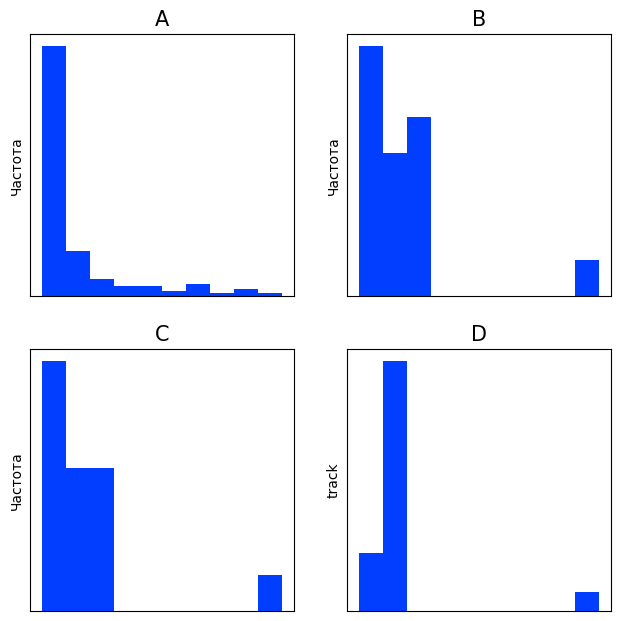

---

## **Задание 4**

Построим матрицу `BCG` для наших продуктов (треков), благодаря этой матрице, мы сможем понять какие треки артиста следуют продвигать:

| | ВЫСОКАЯ ДОЛЯ ПРОСЛУШИВАНИЙ	| НИЗКАЯ ДОЛЯ ПРОСЛУШИВАНИЙ | 
 | --- | --- | --- | 
| ВЫСОКИЙ РОСТ ПОПУЛЯРНОСТИ | ЗВЕЗДЫ | ДИКИЕ КОШКИ | 
| НИЗКИЙ РОСТ ПОПУЛЯРНОСТИ | ДОЙНЫЕ КОРОВЫ | СОБАКИ | 

- ЗВЕЗДЫ: Лидер по прослушиваниям, который продолжают активно расти. Этот трек можно использовать для продвижения артиста.
 - ДИКИЕ КОШКИ: Перспективные треки. Показывают высокий рост, но их доля в общем объеме еще мала. Треки, которые можно продвигать.
- ДОЙНЫЕ КОРОВЫ: Имеют высокое количество прослушиваний, но рост уже остановился. Стабильно генерируют доход без дополнительных инвестиций.
- СОБАКИ: Аутсайдеры. Низкая доля и низкие темпы роста. Обычно не требуют внимания.

### *Задание 4.1*

>*Для начала найдем долю прослушиваний каждого трека:*
>$$ \text{rate playground}_{\text{трека}} = \frac{\text{playcount}_{\text{трека}}}{\text{playcount}_{\text{по всем трекам}}}$$

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**

1. *Найдите общее количество прослушиваний треков артиста (`playcount` по всем трекам).*  

2. *Постройте сводную таблицу, где:*  
   - по строкам идут композиции (*`track`*)  
   - в столбце указано общее количество прослушиваний (*`playcount`*) каждой композиции  

3. *Найдите долю прослушиваний каждого трека (`rate playcount трека`), разделив сводную таблицу на общее количество прослушиваний (`playcount` по всем трекам).*  

4. *Будем считать:*  
   - **ВЫСОКАЯ ДОЛЯ ПРОСЛУШИВАНИЙ** — если доля прослушиваний трека больше среднего.  
     Сохраните эти треки в переменную `high_playcount`.  
   - **НИЗКАЯ ДОЛЯ ПРОСЛУШИВАНИЙ** — если доля прослушиваний трека меньше среднего.  
     Сохраните эти треки в переменную `low_playcount`.  

</div>

### *Задание 4.2*

>*Теперь найдем относительный рост популярности каждого трека по каждому отчетному периоду:*
>$$ \text{grouth}_{\text{трека}} = \frac{\text{playcount}_{\text{текущий период}} - \text{playcount}_{\text{прошлый период}}}{\text{playcount}_{\text{прошлый период}}} \times 100 \%$$

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**

1. *Постройте сводную таблицу, где:*  
   - по строкам идут отчетные периоды (`period`) и композиции (`track`),  
   - в столбце указано общее количество прослушиваний (`playcount`) каждой композиции в каждый отчетный период.  

2. *Примените к сводной таблице метод* `.unstack()`.  
   - В результате отчетные периоды (`period`) останутся по строкам,  
   - а столбцами станут композиции (`track`).  
   - Затем отсортируйте таблицу по отчетным периодам (`period`).  

   *Пример итоговой структуры:*  

   | Трек 1 | ... | Трек N |
   |--------|-----|--------|
   | Период 1: Кол-во прослушиваний | ... | ... |
   | Период 2: Кол-во прослушиваний | ... | ... |
   | ...    | ... | ... |
   | Период N: Кол-во прослушиваний | ... | ... |


3. *Чтобы посчитать рост популярности трека (`growth_трека`), примените метод* `.pct_change()` *к сводной таблице.*  
   - Этот метод автоматически рассчитает рост популярности для треков относительно каждого отчетного периода.  

4. *Рассчитайте средний рост популярности для каждого трека, применив метод* `.mean()` *к сводной таблице.*  

5. *Будем считать:*  
   - **ВЫСОКИЙ РОСТ ПОПУЛЯРНОСТИ** — если `growth_трека` больше среднего.  
     Сохраните эти треки в переменную `high_growth`.  
   - **НИЗКИЙ РОСТ ПОПУЛЯРНОСТИ** — если `growth_трека` меньше среднего.  
     Сохраните эти треки в переменную `low_growth`.  

</div>


### *Задание 4.3*

Наконец, мы можем определить "звезд", "диких кошек", "дойных коров" и "собак".


>- *Укажите какой трек (`track`) является ЗВЕЗДОЙ*
>- *Укажите какой трек (`track`) является ДИКОЙ КОШКОЙ*
>- *Укажите количество треков, которые являются ДОЙНЫМИ КОРОВАМИ*
>- *Укажите количество треков, которые являются СОБАКАМИ*

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**
1. Извлекаем название треков из таблиц `high_playcount`, `low_playcount`, `high_growth`, `low_growth`

2. Трансформируем список с названиями треков во множества, с помощью функции `set()`

3. Пересекаем множества

</div>

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**🤔 Question**  

*С чем связано такое количество?*

</div>


---

## **Задание 5**

***"Звезда"** — это ваш главный актив в матрице `BCG`. Маркетинг должен уметь извлекать из него максимальную пользу:*

- **Продвижение нового контента**: Этот трек можно использовать как «крючок» для продвижения всего альбома или нового релиза артиста. Например, в рекламе: «Познакомьтесь с автором хита [Название трека] — слушайте новый альбом!».
- **Фокус рекламного бюджета**: Логично вкладывать больше средств в продвижение уже популярного трека, так как он уже доказал свою эффективность и имеет максимальную конверсию в прослушивание. Это дает больший охват и вовлечение на каждый вложенный рубль.

>*Укажите какую долю дохода (`royalty`) от стриминга составляет этот трек. Ответ округлите до двух знаков.*


---

## **Задание 6**

### *Задание 6.1*

>*Посмотрите как выглядит динамика (`period`) количества прослушиваний (`playcount`) "звездного" трека (`track`).*

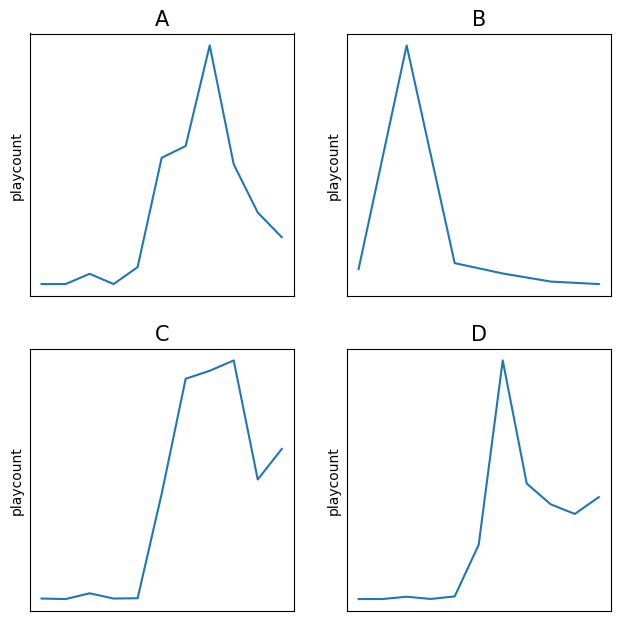

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**
1. Отфильтруйте таблицу и оставьте только данные по "звездному" треку.
2. По отфильтрованным данным, постройте сводную таблицу, где по строкам идет отчетный период (`period`), в столбце сумма по количеству прослушиваний (`playcount`) для каждой композиции.
3. Отсортируйте сводную таблицу по отчетному (`period`) и постройте линейный график.

</div>

### *Задание 6.2*

>*Мы видим резкий рост популярности "звездного" трека с `???` (`period`). Это связано с тем, что пользователи TikTok (и его аналогов в РФ) запустили массовый челлендж под него.*
>
>*Давайте оценим, как виральность "звездного" трека отразилась на прослушивании остальной дискографии артиста.*
>
><div style="background-color: rgba(255, 255, 255, 0.3); text-align: center; padding: 12px; border-radius: 8px;">
>
>***Эффект Гало** (эффект снежного кома) — это когда успех одного продукта увеличивает популярность всех остальных продуктов компании.*
>
></div>
>
>*Найдите трек (`track`), для которого коэффициент подъема после челленджа наибольший:*
>$$\text{Lift factor} = \frac{\text{playcount}_{\text{после челленджа}}}{\text{playcount}_{\text{до челленджа}}}$$
>$\text{Lift factor}$ *показывает во сколько раз увеличилось количество прослушиваний.*

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**

1. Создайте две таблицы `before` и `after`. В `before` будут храниться наблюдения по трекам до челленджа (месяц начала роста включен), в `after` информация по трекам после начала челленджа (месяц начала роста не включен).

2. Создайте две сводные таблицы по данным `before` и `after`. По строкам идут композиции (`track`), а в столбцах общее количество прослушиваний (`playcount`) каждой композиции.

3. Разделите одну сводную таблицу на другую, чтобы найти коэффициент подъема ($\text{Lift factor}$) и найдите трек, на который эффект Гало оказал наибольшее влияние.

</div>

</div>

---

## **Задание 7**

**«Дикая кошка» — ваш главный актив будущего**. Это трек-первопроходец, который нашел аудиторию без бюджета и показывает взрывной рост.
- **Проверка гипотез**: Его успех доказывает, что новое звучание или нишевая тема работают. Ваша задача — удвоить ставку на эту победу.
- **Точечные инвестиции**: Небольшой, но сфокусированный бюджет на продвижение (например, в TikTok или таргетированная реклама) может дать взрывную окупаемость и превратить его в следующую «Звезду».



### *Задание 7.1*

>*Укажите, какой из графиков показывает динамику (`period`) количества прослушиваний (`playcount`) "дикой кошки" (`track`).*

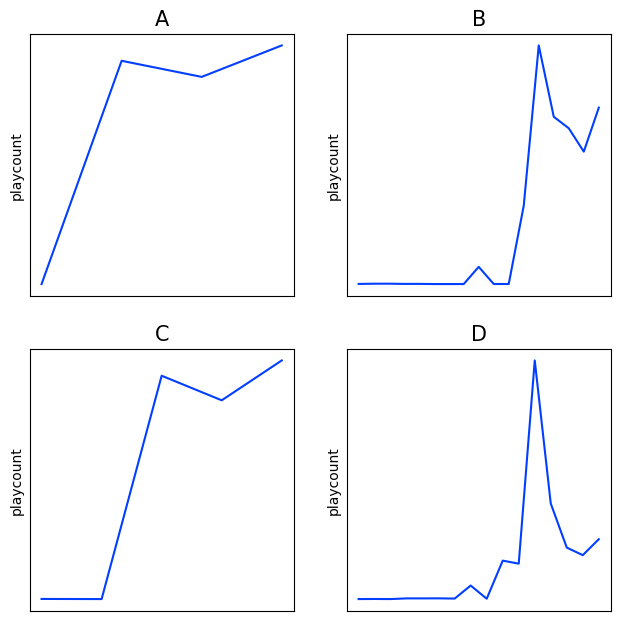

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**🤔 Question**  

*Можно ли сказать, что популярность "дикой кошки" обусловлена эффектом Гало из-за челленджа под "звездный" трек?*

</div>


### *Задание 7.2*

>*Укажите как выглядит распределение доходов (`royalty`) и прослушиваний (`playcount`) "дикой кошки" (`track`) по стриминговым платформам (`platform`).*
>- Доход по платформам: `?`
>- Прослушивания по платформам: `?`

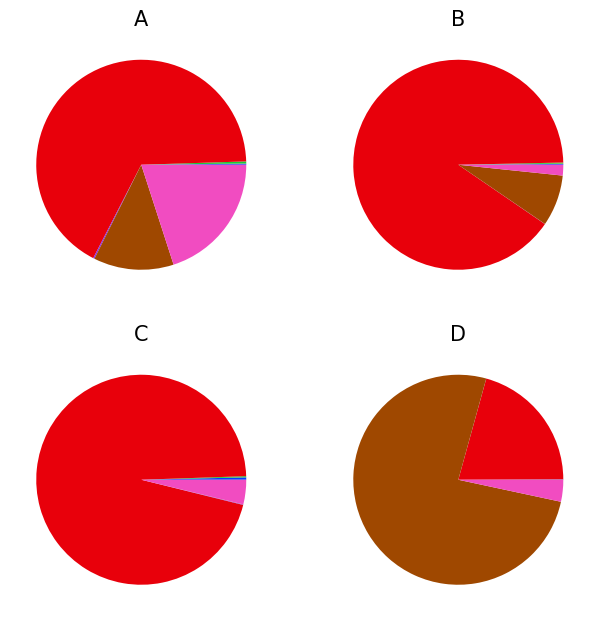

### *Задание 7.3*

>*Укажите на какой платформе (`platform`) следует продвигать "дикую кошку" (`track`) с точки зрения доходов (`royalty`) и прослушиваний (`platform`)*

---